<a href="https://colab.research.google.com/github/mtsilimos/ETH/blob/main/CV_BEST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteFPEPLI/oxford_iiit_pet-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteFPEPLI/oxford_iiit_pet-test.tfrecord*...: …

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [48]:
from keras.datasets import mnist;

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()
import seaborn as sns
import collections
import matplotlib.pyplot as plt

value_count_training = collections.Counter(training_dataset_y)

In [58]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

In [59]:
# Mount colab to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
input_dir = '/content/drive/My Drive/images/*.png'
target_dir = '/content/drive/My Drive/masks/*.png'


In [65]:
import cv2
import glob

for filename in glob.glob('/content/drive/My Drive/images/*.png'):
    print(filename)
    img=cv2.imread(filename)
    train_images=cv2.resize(img, (128, 128))


/content/drive/My Drive/images/105618339-super-purple-modern-suv-car-side-view.png
/content/drive/My Drive/images/156551_preview.png
/content/drive/My Drive/images/2009-Ford-Kuga-Show-Car-Side-1280x960.png
/content/drive/My Drive/images/1965-Shelby-Cobra-Roadster-Side-Profile.png
/content/drive/My Drive/images/2011-278656-pagani-huayra-side-view1.png
/content/drive/My Drive/images/2018-bm4-gt4-sports-car-side-view-pk.png
/content/drive/My Drive/images/2008-Morgan-Life-Car-Side-Speed-1024x768.png
/content/drive/My Drive/images/105618639-modern-pale-blue-suv-car-side-view.png
/content/drive/My Drive/images/178583_Side_Profile_Web.png
/content/drive/My Drive/images/003.png
/content/drive/My Drive/images/2015_aston_martin_db10_4.png
/content/drive/My Drive/images/G40-Junior-GT5-car-side.png
/content/drive/My Drive/images/2018-nissan-sentra-2017-nissan-sentra-car-nissan-micra-png-f.png
/content/drive/My Drive/images/2020-Honda-City-7-1068x672.png
/content/drive/My Drive/images/2019-acura-rd

In [66]:
import numpy as np
import random

In [69]:
# define the image size, get number of inp images
img_size = (200, 200)
num_imgs = len(train_images)


In [70]:
random.Random(1337).shuffle(train_images)


In [73]:
def path_input(path):
  """
  load and return the image
  """
  img = img_to_array(load_img(path, target_size=img_size))
  return img

In [74]:
def path_target(path):
  """
  This function will load and return the  targets
  """
  img = img_to_array(load_img(path, target_size=img_size, color_mode="grayscale"))
  img = img.astype("uint8") - 1

  return img

In [89]:
# define arrays for images
input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")

In [91]:

train_input_imgs = input_imgs
train_targets = targets
val_input_imgs = input_imgs
val_targets = targets

In [92]:
# import libraries
import keras
from keras.layers import *
from keras.models import Model, load_model

In [93]:
def get_model(img_sizem ,num_classes):
  """
  This function will define the U-net model
  """
  # define the input layer
  input_layer = Input(shape=img_size + (3, ))

  # Rescaling layer
  rescaling = Rescaling(1. / 255)(input_layer) # rescale input images to [0, 1]

  # define convolution layers (Downward)
  x = Conv2D(64, 3, padding="same", activation="relu", strides=2)(rescaling)
  x = Conv2D(64, 3, padding="same", activation="relu")(x)
  x = Conv2D(128, 3, padding="same", activation="relu", strides=2)(x)
  x = Conv2D(128, 3, padding="same", activation="relu")(x)
  x = Conv2D(256, 3, padding="same", activation="relu", strides=2)(x)
  x = Conv2D(256, 3, padding="same", activation="relu")(x)
  x = Dropout(0.01)(x)
  # define Transpose layers (Upward)
  # define Transpose layers (Upward)
  y = Conv2DTranspose(256, 3, padding="same", activation="relu")(x)
  y = Conv2DTranspose(256, 3, padding="same", activation="relu", strides=2)(y)
  y = Conv2DTranspose(128, 3, padding="same", activation="relu")(y)
  y = Conv2DTranspose(128, 3, padding="same", activation="relu", strides=2)(y)
  y = Conv2DTranspose(64, 3, padding="same", activation="relu")(y)
  y = Conv2DTranspose(64, 3, padding="same", activation="relu", strides=2)(y)
  y = Dropout(0.01)(y)

  # define the output layer
  output_layer = Conv2D(num_classes, 3, padding="same", activation="softmax")(y)

  # create the model
  model = Model(input_layer, output_layer)

  return model


In [94]:

# make the model
model = get_model(img_size, 3)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 64)      1792      
                                                                 
 conv2d_8 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 50, 50, 128)       147584    
                                                                 
 conv2d_11 (Conv2D)          (None, 25, 25, 256)       2951

In [97]:
# compile the model
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics =['accuracy'])

In [98]:
history = model.fit(train_input_imgs, train_targets, epochs=3, batch_size=16, validation_data=(val_input_imgs, val_targets))

Epoch 1/3
8/8 [==============================] - 6s 291ms/step - loss: 1.0456 - accuracy: 1.0000 - val_loss: 1.0363 - val_accuracy: 1.0000
Epoch 2/3
8/8 [==============================] - 2s 234ms/step - loss: 1.0309 - accuracy: 1.0000 - val_loss: 1.0243 - val_accuracy: 1.0000
Epoch 3/3
8/8 [==============================] - 2s 235ms/step - loss: 1.0195 - accuracy: 1.0000 - val_loss: 1.0134 - val_accuracy: 1.0000


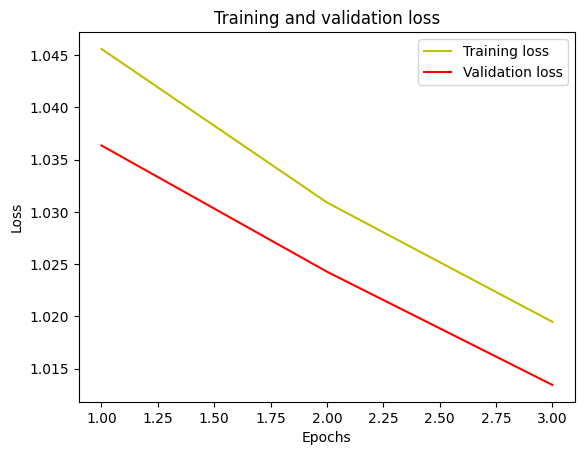

In [101]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()